In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# VERİ YÜKLEME VE ÖN İŞLEME
df = pd.read_csv(r"C:\Users\ydaml\online+shoppers+purchasing+intention+dataset.zip")

# Kategorik verileri sayısal değerlere çevirme
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Özellik ve hedef değişkenleri ayır
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

# Veriyi normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# MODELLERİ EĞİT
# Karar Ağacı
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Rastgele Orman
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Lineer Regresyon (0.5 eşiği ile sınıflandırma gibi kullanıldı)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = (model_lr.predict(X_test) >= 0.5).astype(int)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# DEĞERLENDİRME FONKSİYONU
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Doğruluk (Accuracy): {accuracy:.4f}")
    print(f"Hassasiyet (Precision): {precision:.4f}")
    print(f"Duyarlılık (Recall): {recall:.4f}")
    print(f"F1-Skoru (F1 Score): {f1:.4f}")
    

# MODELLERİ DEĞERLENDİR
evaluate_model("Karar Ağacı", y_test, y_pred_dt)
evaluate_model("Rastgele Orman", y_test, y_pred_rf)
evaluate_model("K-En Yakın Komşu", y_test, y_pred_knn)
evaluate_model("Lineer Regresyon (Eşikli)", y_test, y_pred_lr)
evaluate_model("Basit Bayes", y_test, y_pred_nb)



Karar Ağacı
Doğruluk (Accuracy): 0.8491
Hassasiyet (Precision): 0.5138
Duyarlılık (Recall): 0.5513
F1-Skoru (F1 Score): 0.5319

Rastgele Orman
Doğruluk (Accuracy): 0.8989
Hassasiyet (Precision): 0.7269
Duyarlılık (Recall): 0.5600
F1-Skoru (F1 Score): 0.6326

K-En Yakın Komşu
Doğruluk (Accuracy): 0.8754
Hassasiyet (Precision): 0.6815
Duyarlılık (Recall): 0.3722
F1-Skoru (F1 Score): 0.4814

Lineer Regresyon (Eşikli)
Doğruluk (Accuracy): 0.8729
Hassasiyet (Precision): 0.8070
Duyarlılık (Recall): 0.2400
F1-Skoru (F1 Score): 0.3700

Basit Bayes
Doğruluk (Accuracy): 0.7967
Hassasiyet (Precision): 0.4102
Duyarlılık (Recall): 0.7026
F1-Skoru (F1 Score): 0.5179


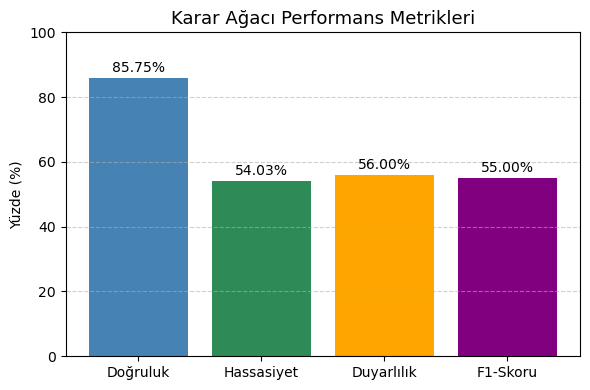

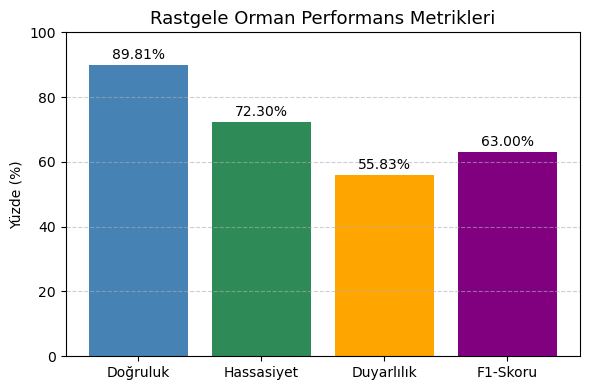

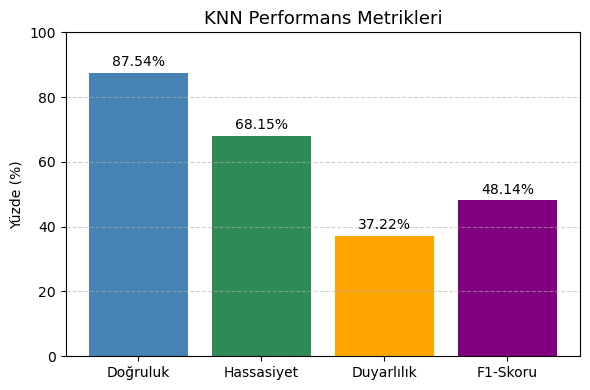

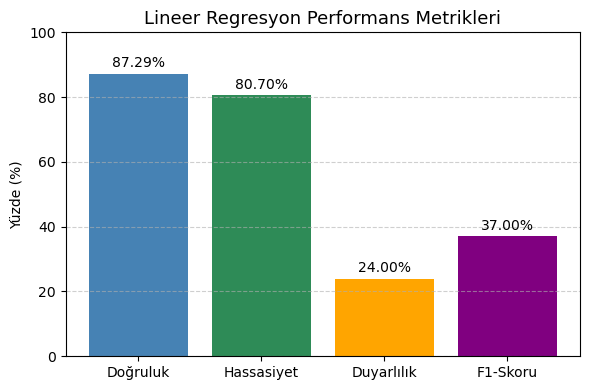

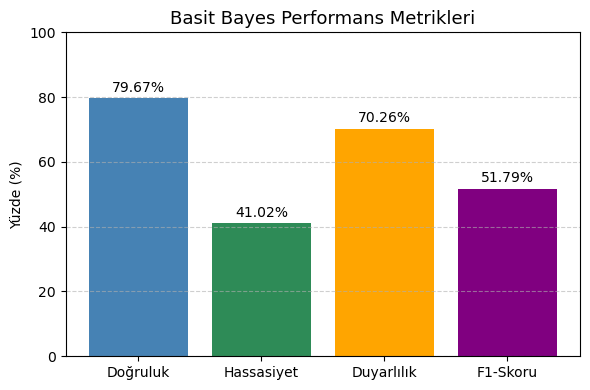

In [4]:
import matplotlib.pyplot as plt

# Modeller ve metrikleri
models_metrics = {
    'Karar Ağacı':     [85.75, 54.03, 56.00, 55.00],
    'Rastgele Orman':  [89.81, 72.30, 55.83, 63.00],
    'KNN':             [87.54, 68.15, 37.22, 48.14],
    'Lineer Regresyon': [87.29, 80.70, 24.00, 37.00],
    'Basit Bayes':     [79.67, 41.02, 70.26, 51.79]
}

# Metrik isimleri
metrics_labels = ['Doğruluk', 'Hassasiyet', 'Duyarlılık', 'F1-Skoru']

# Her model için ayrı grafik
for model, metrics in models_metrics.items():
    plt.figure(figsize=(6,4))
    bars = plt.bar(metrics_labels, metrics, color=['steelblue', 'seagreen', 'orange', 'purple'])

    # Değerleri çubukların üstüne yaz
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 100)
    plt.title(f"{model} Performans Metrikleri", fontsize=13)
    plt.ylabel("Yüzde (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


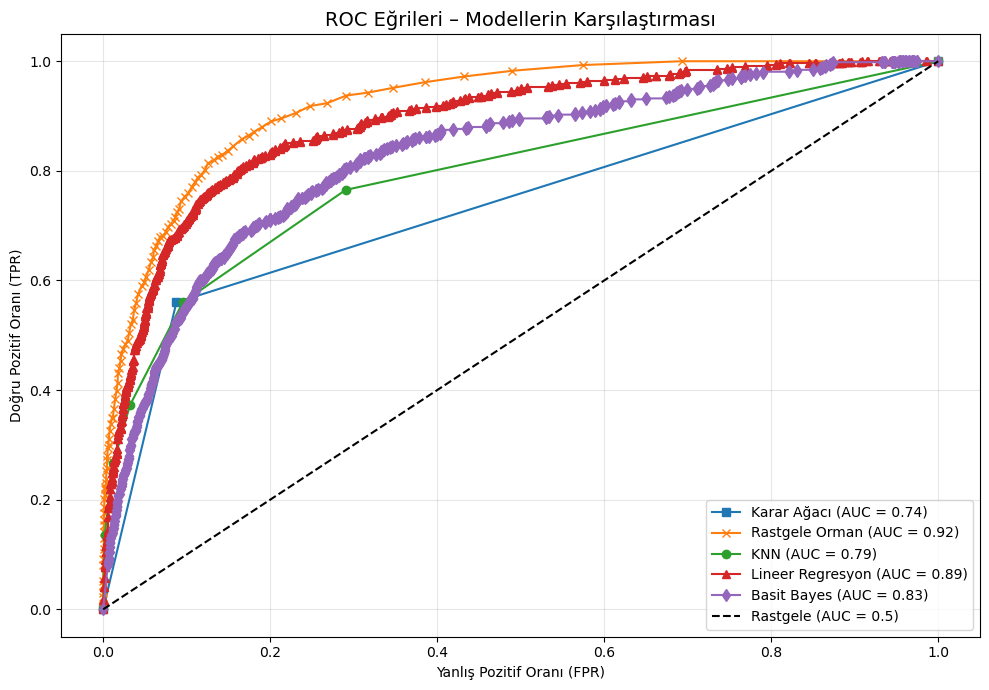

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC eğrileri için gerekli olan: predict_proba() veya .predict() sonrası olasılık
# Lineer Regresyon modeli için özel: predict sonucu zaten sürekli değer

# Olasılık tahminlerini al (1. sınıfa ait olasılıklar)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_proba_knn = model_knn.predict_proba(X_test)[:, 1]
y_proba_lr = model_lr.predict(X_test)  # Lineer Regresyon sürekli değer verir
y_proba_nb = model_nb.predict_proba(X_test)[:, 1]

# ROC eğrisi için FPR, TPR ve AUC hesapla
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)
auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

# ROC eğrilerini çiz
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f"Karar Ağacı (AUC = {auc_dt:.2f})", linestyle='-', marker='s')
plt.plot(fpr_rf, tpr_rf, label=f"Rastgele Orman (AUC = {auc_rf:.2f})", linestyle='-', marker='x')
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", linestyle='-', marker='o')
plt.plot(fpr_lr, tpr_lr, label=f"Lineer Regresyon (AUC = {auc_lr:.2f})", linestyle='-', marker='^')
plt.plot(fpr_nb, tpr_nb, label=f"Basit Bayes (AUC = {auc_nb:.2f})", linestyle='-', marker='d')

# Rastgele sınıflayıcı çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele (AUC = 0.5)')

# Grafik ayarları
plt.title("ROC Eğrileri – Modellerin Karşılaştırması", fontsize=14)
plt.xlabel("Yanlış Pozitif Oranı (FPR)")
plt.ylabel("Doğru Pozitif Oranı (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
